# Team Project 4 - Linear Algebra and Data Compression

Linear algebra provides many powerful and exciting applications. Examples include:
<ul>
    <li>Face recognition via Eigenface;</li>
    <li>Data compression using Singular Value Decomposition;</li>
    <li>JPEG/MPEG compression via discrete cosine transform;</li>
    <li>Signal/sound compression via Fourier series.</li>
</ul>
A common feature is that by using techniques from linear algebra, one may find a very nice approximation of given data (in a very big or even infinite-dimensional vector space) in a reasonable small vector space. 

In this project, we investigate how to compress continuous sound data by using finitely many numbers.

Sound data is given as a continuous function $f(t)$. If we divide the time interval into reasonably small subintervals, then on each interval, the function $f(t)$ looks like a periodic function, because the sound is a vibration that propagates as an (in general very complicated) wave of pressure and a wave is periodic. From now on, for simplicity, assume that the period of $f(t)$ is $2\pi$ and we will assume that $f(t) \in C[-\pi, \pi]$. 

On $C[-\pi, \pi]$, the following formula yields an inner product:
$$\langle g, h\rangle = \frac{1}{\pi}\int_{-\pi}^{\pi}g(t)h(t)dt.$$
Furthermore, we know that the following set is an orthonormal set. 
$$T_n := \{\frac{1}{\sqrt{2}}, \sin t, \cos t, \sin 2t, \cos 2t, \cdots, \sin nt, \cos nt\}$$
Let $W_n$ be the sub vector space of $C[-\pi, \pi]$ spanned by $T_n$. Then for any $f(t) \in C[-\pi, \pi]$, its best approximation in $W_n$ is given by
$$\hat{f}_n(t) := \langle f(t), \frac{1}{\sqrt{2}}\rangle \frac{1}{\sqrt{2}} + \sum_{k=1}^n \langle f(t), \sin kt\rangle \sin kt + \sum_{k=1}^n \langle f(t), \cos kt\rangle \cos kt.$$

#### 1. (20 pts) Construct a function Simpson(f, m) which evaluates the definite integral $$\int_{-\pi}^{\pi}f(t)dt$$ with $m$ intervals by using Simpson's rule. Note that $m$ has to be an even number.

In [2]:
import numpy as np

def Simpson(f, m):
    returnValue = 0
    currValue = -np.pi
    iterValue = 2*np.pi/m
    for i in range(m+1):
        if i == 0 or i == m:
            coeff = 1
        else:
            if i%2 == 0:
                coeff = 2
            else:
                coeff = 4
        returnValue += coeff*f(currValue)
        currValue += iterValue
    return iterValue/3 * returnValue

def f(x):
    return x**2
    
print(Simpson(f, 200))

20.67085112019988


#### 2. (15 pts) Create a function FourierCoeff(f, n) which returns the list of Fourier coefficients $a_0, a_1, \cdots, a_n$ and $b_1, b_2, \cdots, b_n$ where $a_0 = \langle f(t), 1\rangle$, $a_k = \langle f(t), \cos kt\rangle$ for $k \ge 1$, $b_k = \langle f(t), \sin kt\rangle$. To calculate each coefficient, use the function Simpson(f, m) with $m = 200$.

In [3]:
def FourierCoeff(f, n):
    fourierArr = []
    m = 200
    fourierArr.append(1/(np.pi*np.sqrt(2))*Simpson(f, m))
    for i in range(1, n+1):
        g = lambda x: f(x)*np.cos(i*x)
        fourierArr.append(1/np.pi*Simpson(g, m))
    for i in range(1, n+1):
        g = lambda x: f(x)*np.sin(i*x)
        fourierArr.append(1/np.pi*Simpson(g, m))
    return fourierArr

def function(x):
    return (x)*((np.sin(x))**2)

print(FourierCoeff(function,5))

[-2.4157344438529835e-16, 1.5558156614877243e-16, 2.0456437469877254e-16, -2.0747292772683465e-17, -5.902107506431673e-17, -5.105291189799829e-17, 1.3333332683175683, -0.3749998698154799, -0.26666686232659065, 0.08333359493030663, -0.03809556624792134]


Note that the initial data is a continuous function, but the approximation is recorded as a list of $2n+1$ numbers!

#### 3. (15 pts) Create a function FourierApprox(f) which plots the graphs of $f(t)$ and $S_n(t)$ with $n = 2, 5, 10$ over $[-\pi, \pi]$ on the same plane (with different color). Test your function with $f(t) = \cosh(t)$ and $f(t) = \sqrt{\pi^2-t^2}$. Run the function with your favorite $f(t)$, too. Note that to get a 'periodic' continuous function $f(t)$ defined on $\mathbb{R}$, $f(-\pi) = f(\pi)$. Test your function with $f(t) = e^t$ as well (Note that this one is continuous on $[-\pi, \pi]$, but does not continuously extend to $\mathbb{R}$ because $f(-\pi) \ne f(\pi)$. See what happens near two boundary points.). 

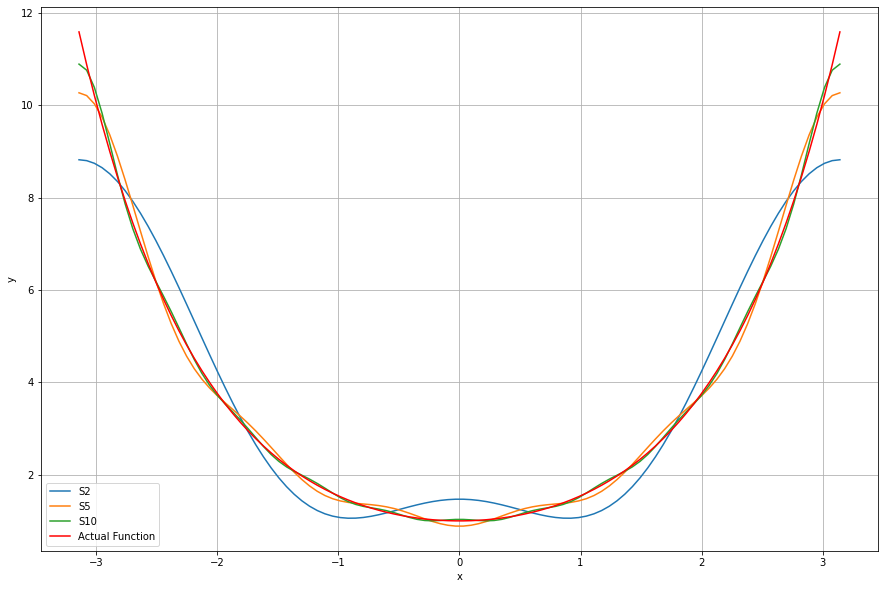

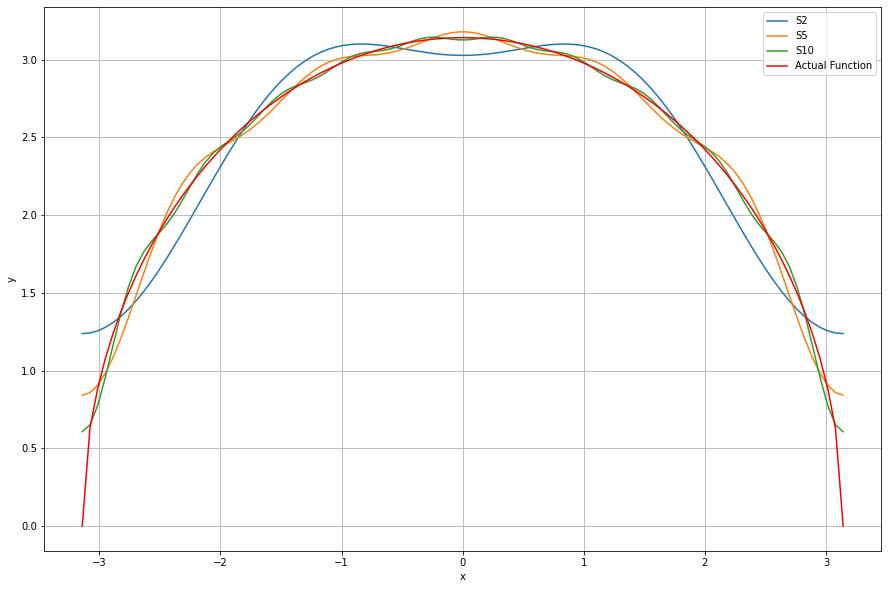

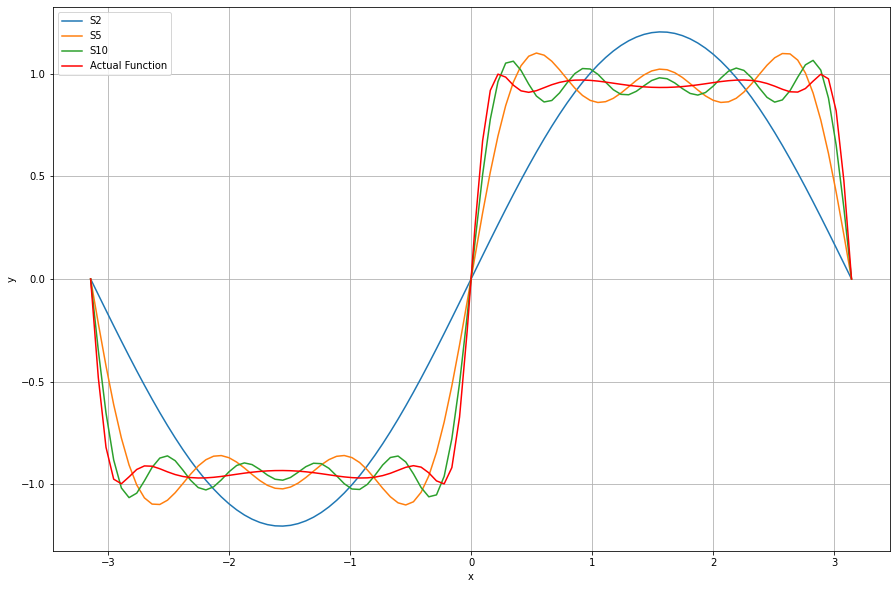

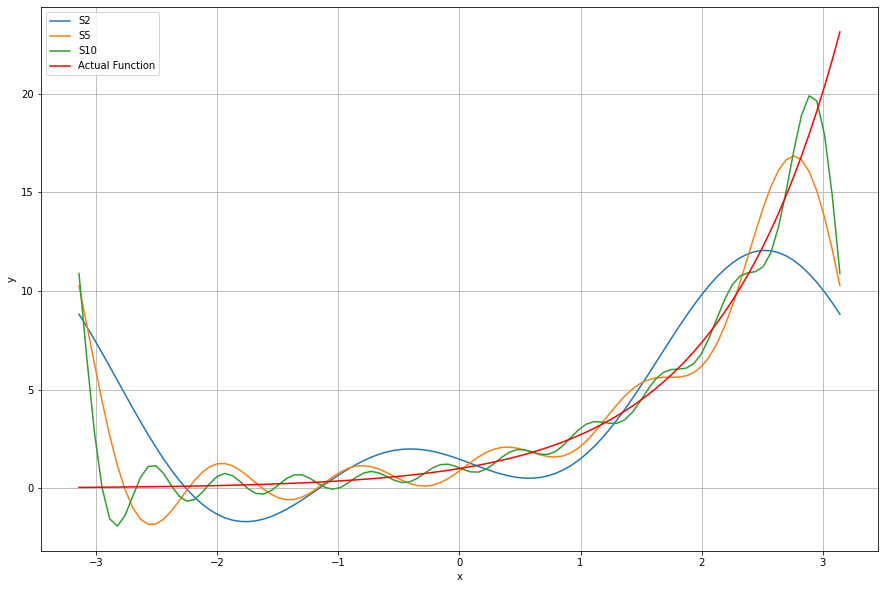

In [125]:
import matplotlib.pyplot as plt

def FourierApprox(f):
    nArr = [2, 5, 10]
    for n in nArr:
        coeff = FourierCoeff(f, n)
        sn = lambda x: coeff[0]*1/np.sqrt(2) + sum(coeff[i]*np.cos(i*x) for i in range(1, n+1)) + sum(coeff[i]*np.sin((i-n)*x) for i in range(n+1, 2*n+1))
        x = np.linspace(-np.pi, np.pi, 100)
        y = sn(x)
        plt.plot(x, y, label='S'+str(n))
    plt.plot(x, f(x), label = "Actual Function", color = "red")
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()

f1 = lambda x: np.cosh(x)
f2 = lambda x: np.sqrt(abs(np.pi**2-x**2))
f3 = lambda x: np.sin(2*np.sin(2*np.sin(2*np.sin(x))))
f4 = lambda x: np.exp(x)

FourierApprox(f1)
FourierApprox(f2)
FourierApprox(f3)
FourierApprox(f4)

1. (20 pts)

2. (15 pts)

3. (15 pts)

(20 + 15 + 15 = 50) Good job!